A project completed by Jacqueline Hernandez, Will Harrigan and Cameron Angulo. 

Summary: We used Ghannoum et al's allometric data of Eucalyptus saligna and Eucalyptus sideroxylon individuals grown for 80 and 150 days under one of three CO2 concentrations and one of two temperatures. These treatment groups were meant to mimic pre-industrial, current, and future environmental conditions. We used the corresponding paper to guide us in our data wrangling, analysis and data visualization goals. 

Based on Ghannoum, O. et al. "Exposure to Preindustrial, current, and future atmospheric CO2 and temperature differentially affects growth and photosynthesis in Eucalyptus." Global Change Biology, Volume 16, pages 303-319. doi:10.1111/j.1365-2486.2009.02003.x

Raw data sourced from https://github.com/dfalster/baad/tree/master/data/Ghannoum2010b and https://github.com/dfalster/baad/tree/master/data/Ghannoum2010a

In [26]:
library(dplyr)
library(tibble)
library(scales)
library(ggplot2)

# Loading in the data

In [4]:
Ghannoum_b <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010b/data.csv")))
Ghannoum_a <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010a/data.csv")))
head(Ghannoum_b)
head(Ghannoum_a)

Species,Temp,CO2,Potnum,LA,Height,Basaldia,LeafDW,StemDW,RootDW,LMA,LAR
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saligna,Amb,400,55,376,23.3,2.97,1.12,0.44,1.28,29.79,13.25
Saligna,Amb,400,51,682,20.1,3.07,0.89,0.34,0.95,13.05,31.34
Saligna,Amb,400,78,539,28.2,3.11,1.46,0.65,1.21,27.09,16.22
Saligna,Amb,400,77,739,17.6,2.51,0.54,0.20,0.47,7.31,61.03
Saligna,Amb,400,49,582,24.3,3.38,1.61,0.74,1.34,27.66,15.78
Saligna,Amb,400,45,258,16.4,2.57,0.62,0.28,1.01,24.03,13.54


Species,CO2,Temp,Water,Potnum,LeafDW,StemDW,RootDW,RootShoot,LMA,⋯,Basaldia1,Basaldia2,Tipdia1,Tipdia2,Height,Branchnum,Mainstemnum,Primarybranchnum,Secondarybranchnum,Tertiarybranchnum
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
Saligna,280,Amb,dry,132,15.74,13.10,8.77,0.30,32.48,⋯,8.35,8.29,1.30,1.72,97,61,NA,28,33,0
Saligna,280,Amb,dry,133,17.58,14.16,22.74,0.71,34.22,⋯,8.40,8.42,1.43,1.28,105,59,NA,26,33,0
Saligna,280,Amb,dry,139,18.19,15.30,15.62,0.46,33.35,⋯,9.61,9.59,1.82,3.08,115,37,NA,27,10,0
Saligna,280,Amb,dry,150,14.22,13.83,8.01,0.28,33.01,⋯,7.84,7.80,2.45,2.05,112,53,NA,31,22,0
Saligna,280,Amb,dry,158,22.26,18.42,22.19,0.54,40.22,⋯,9.35,9.21,2.80,1.74,104,76,NA,32,44,0
Saligna,280,Amb,dry,162,18.71,17.50,18.41,0.50,40.90,⋯,10.13,10.60,1.47,1.99,103,60,NA,29,31,0


# Data Wrangling
The raw data in Github was already quite tidy. However it was split by the age of the individual Eucalyptus when they were harvested for data collection. This would make calculations more difficultWe joined the data sets together and added column DAP (days after planting) to signify if the observations in that row were made on day 80 or day 150. 

A column "totalDW" was added for all observations. This column was calculated by summing all of the dry weight columns for each row.

In the species name column, some observations included only the species name, and some used the first letter of the genus name. This had to be corrected as well.

We also created a separate table containing averages for the treatment groups in this study.

In [5]:
#In dataset for Ghannoum2010b add column titled "DAP" and set to 80.
#In dataset for Ghannoum2010a add column titled "DAP" and set to 150.
#Bind data together using rbind or cbind function, save as new_data.
Ghannoum_b$DAP <- 80 
Ghannoum_a$DAP <- 150

In [6]:
Ghannoum_b$totalDW <- Ghannoum_b$LeafDW + Ghannoum_b$StemDW + Ghannoum_b$RootDW
Ghannoum_a$totalDW <- Ghannoum_a$LeafDW + Ghannoum_a$StemDW + Ghannoum_a$RootDW

In [7]:
Ghannoum_b$Species[which(Ghannoum_b$Species=="E. saligna")] <- "Saligna" #fix a few inconsistently named rows

In [8]:
print("Results from each treatment group will be placed in this table")
species <- sort(rep(unique(Ghannoum_b$Species), 6))
temp <- unique(Ghannoum_b$Temp) %>% rep(3) %>% sort
CO2 <- unique(Ghannoum_b$CO2) %>% sort %>% rep(4)
DW <- rep(NA, 12)
Height <- rep(NA, 12)
rgr <- rep(NA, 12)
nar <- rep(NA, 12)
group_data<- data.frame(species, temp, CO2, DW, Height, rgr, nar) 
group_data #will contain the means of various metrics for each treatment group

[1] "Results from each treatment group will be placed in this table"


species,temp,CO2,DW,Height,rgr,nar
<chr>,<chr>,<int>,<lgl>,<lgl>,<lgl>,<lgl>
Saligna,Amb,280,NA,NA,NA,NA
Saligna,Amb,400,NA,NA,NA,NA
Saligna,Amb,640,NA,NA,NA,NA
Saligna,Elv,280,NA,NA,NA,NA
Saligna,Elv,400,NA,NA,NA,NA
Saligna,Elv,640,NA,NA,NA,NA
Sideroxylon,Amb,280,NA,NA,NA,NA
Sideroxylon,Amb,400,NA,NA,NA,NA
Sideroxylon,Amb,640,NA,NA,NA,NA


## Relative Growth Rate (RGR) and Net Assimilation Rate (NAR)
To find relative growth rate and net assimilation rate the following equation was used, as quoted from Ghannoum et al 2010:

We first subset the data by the 12 treatment groups, which varied on species (E. saligna versus E. sideroxylon), temperature (ambient versus elevated) and CO2 levels (280, 400, and 640 ppm). Looking at each subset, we paired trees from DAP 80 (T1) and DAP 150 (T2) depending on size. We then calculated RGR and NAR for all 12 subsets per the equations and averaged the results. 

We compared those averages with total treatment averages, meaning we summed all of the dry mass, whole plant leaf area, and times for DAP 80 and DAP 150 and then calculated the equation below. 

![snippet_rgr_nar.png](attachment:snippet_rgr_nar.png)

In [9]:
##outputs rgr and nar values
rgr_nar <- function(n){
    tmp_DW80 <- subset(Ghannoum_b, Species == group_data$species[n] & Temp == group_data$temp[n] & CO2== group_data$CO2[n], select = totalDW) %>% sum
    tmp_DW150 <- subset(Ghannoum_a, Species == group_data$species[n] & Temp == group_data$temp[n] & CO2 == group_data$CO2[n], select = totalDW) %>% sum
    rgr <- (log(tmp_DW150) - log(tmp_DW80)) / 70
    
    tmp_LA80 <- subset(Ghannoum_b, Species == group_data$species[n] & Temp == group_data$temp[n] & CO2== group_data$CO2[n], select = LA) %>% sum
    tmp_LA150 <- subset(Ghannoum_a, Species == group_data$species[n] & Temp == group_data$temp[n] & CO2== group_data$CO2[n], select = LA) %>% sum
    nar <- ((log(tmp_LA150) - log(tmp_LA80)) * (tmp_DW150 - tmp_DW80)) / ((tmp_LA150 - tmp_LA80)* 70)
    return(c(rgr,nar))}

In [10]:
#putting rgr and nar into the group data
tmp <- t(mapply(rgr_nar, 1:12)) 

group_data$rgr <- tmp[,1]
group_data$nar <- tmp[,2]
group_data

species,temp,CO2,DW,Height,rgr,nar
<chr>,<chr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>
Saligna,Amb,280,NA,NA,0.04532699,0.0004488385
Saligna,Amb,400,NA,NA,0.05461554,0.0005232528
Saligna,Amb,640,NA,NA,0.04709482,0.0005569811
Saligna,Elv,280,NA,NA,0.04539022,0.0003789528
Saligna,Elv,400,NA,NA,0.04017024,0.0004397112
Saligna,Elv,640,NA,NA,0.03846561,0.0005428327
Sideroxylon,Amb,280,NA,NA,0.03321595,0.0006958998
Sideroxylon,Amb,400,NA,NA,0.04947798,0.0009789003
Sideroxylon,Amb,640,NA,NA,0.04251638,0.0009550612


In [11]:
#plot the individual rgr and nar results in a histogram.
#plot a dot for the average.
#maybe can combine species in each plot, just color code, so that there aren't 6 different plots.
#perhaps present it in grid form using facet_wrap.

# Statistical Analyses
In Ghannoum et al 2010, "Data were analyzed using a general linear model, ANOVA with species, growth [C02] and growth temperature as independent factors. Means were compared using Newman-Keuls post-hoc test." Thus, we also ran those statisical analyses and were able to replicate Table 1 and Table 2. 

![snippet_table_1.png](attachment:snippet_table_1.png)
Table 1.

![snippet_table_2.png](attachment:snippet_table_2.png)
Table 2. 

In [12]:
head(group_data)

,species,temp,CO2,DW,Height,rgr,nar
,<chr>,<chr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>
1,Saligna,Amb,280,NA,NA,0.04532699,0.0004488385
2,Saligna,Amb,400,NA,NA,0.05461554,0.0005232528
3,Saligna,Amb,640,NA,NA,0.04709482,0.0005569811
4,Saligna,Elv,280,NA,NA,0.04539022,0.0003789528
5,Saligna,Elv,400,NA,NA,0.04017024,0.0004397112
6,Saligna,Elv,640,NA,NA,0.03846561,0.0005428327


In [13]:
Ghannoum_a %>%
  group_by(Species, Temp, CO2) %>%
  summarize(mean_totalDW = mean(totalDW))


`summarise()` has grouped output by 'Species', 'Temp'. You can override using
the `.groups` argument.


Species,Temp,CO2,mean_totalDW
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,57.18389
Saligna,Amb,400,58.96056
Saligna,Amb,640,84.71278
Saligna,Elv,280,60.16889
Saligna,Elv,400,89.07056
Saligna,Elv,640,118.83222
Sideroxylon,Amb,280,15.53500
Sideroxylon,Amb,400,16.81500
Sideroxylon,Amb,640,29.54889


                  Df Sum Sq Mean Sq  F value   Pr(>F)    
Species            1 155226  155226 1027.652  < 2e-16 ***
CO2                1  37858   37858  250.635  < 2e-16 ***
Temp               1  11967   11967   79.226 2.82e-16 ***
Species:CO2        1   4581    4581   30.331 1.07e-07 ***
Species:Temp       1   3001    3001   19.865 1.36e-05 ***
CO2:Temp           1   3677    3677   24.346 1.65e-06 ***
Species:CO2:Temp   1    548     548    3.628   0.0582 .  
Residuals        207  31267     151                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

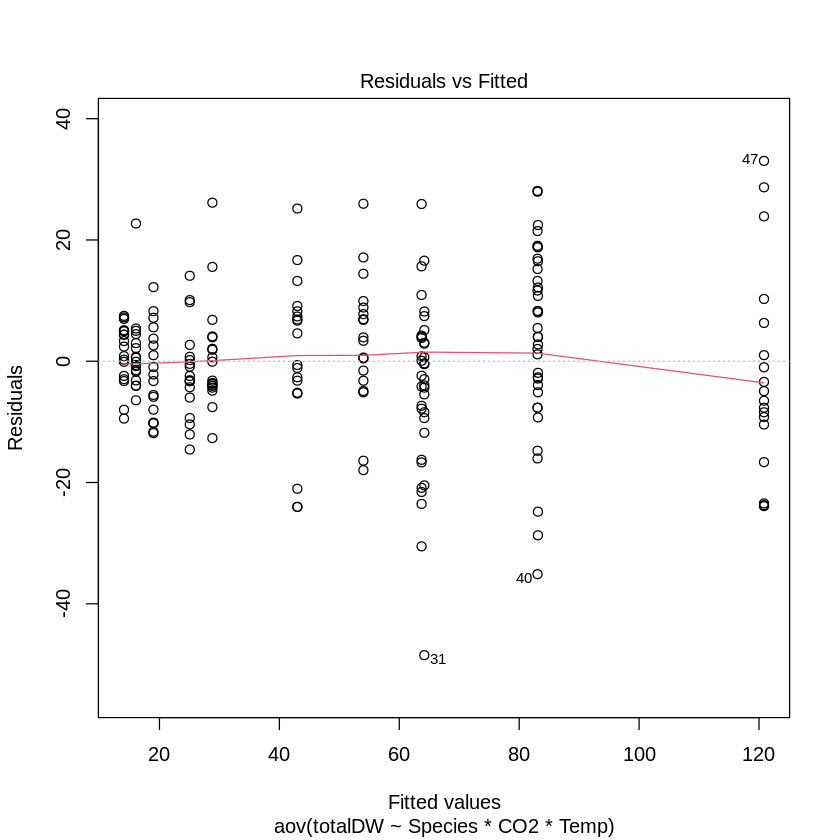

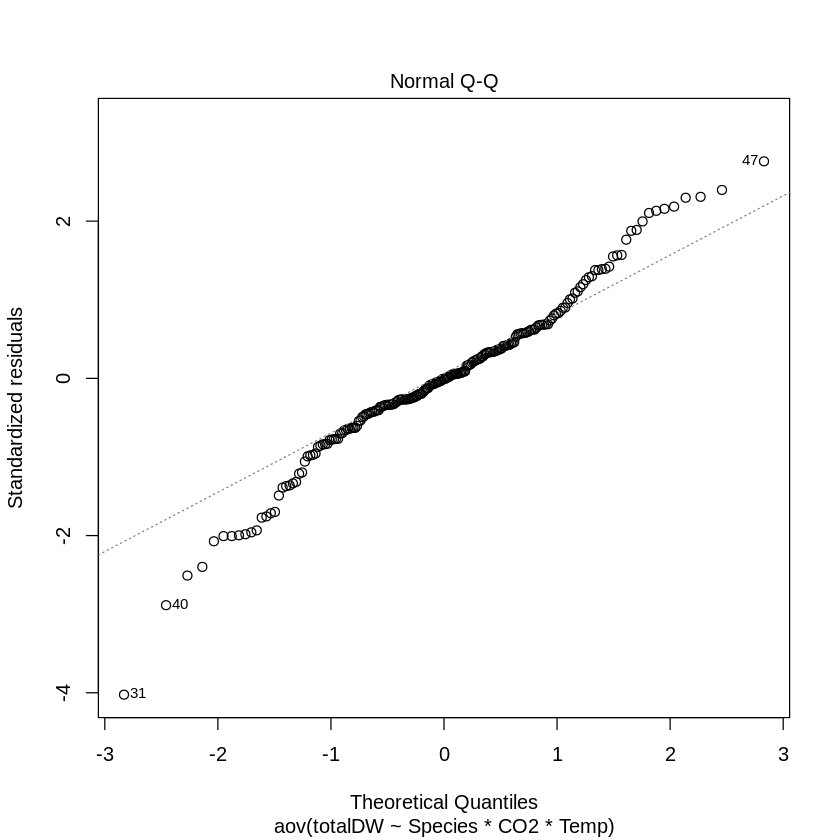

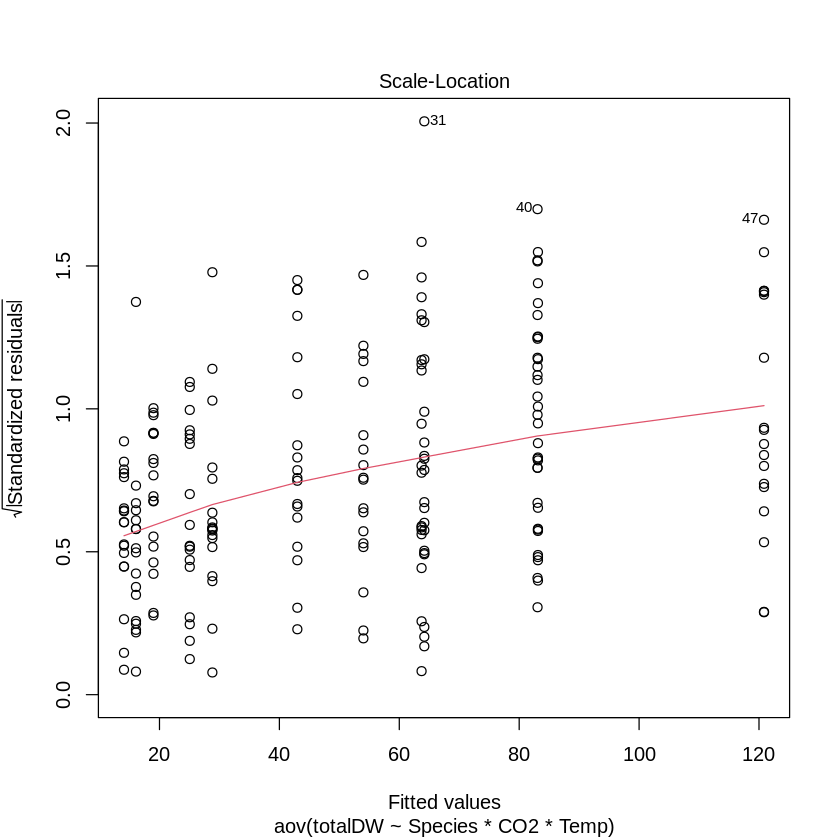

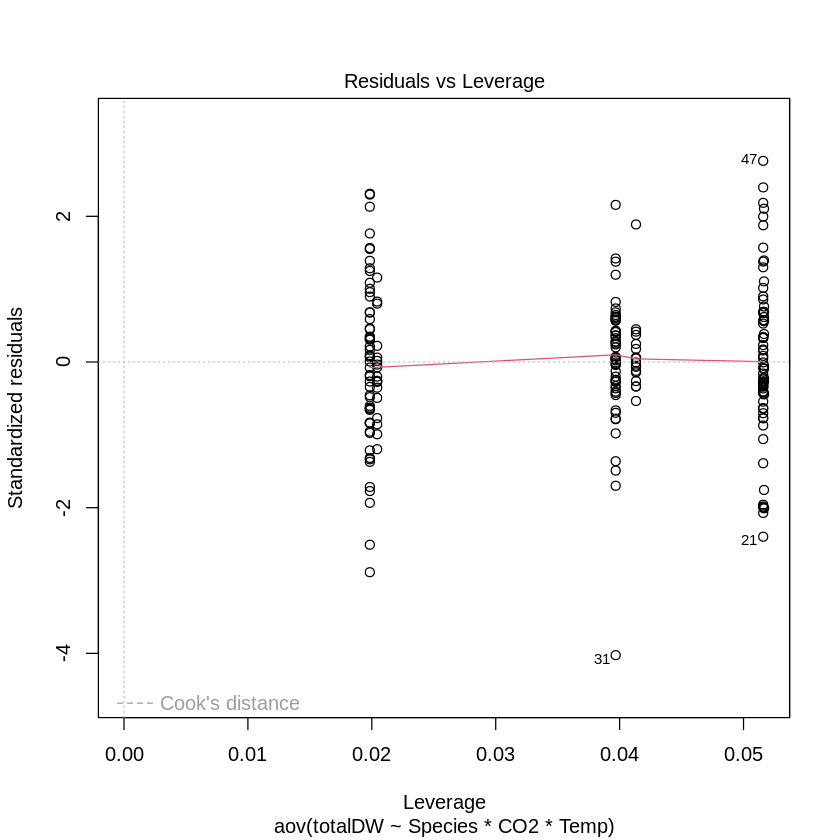

In [41]:
#perform three-way ANOVA
model <- aov(totalDW ~ Species * CO2 * Temp, data=Ghannoum_a)

#view summary of three-way ANOVA
summary(model)

#Plot of ANOVA results
plot(model)

In [15]:
data <- data.frame(group_data, leafDW=NA)
data

species,temp,CO2,DW,Height,rgr,nar,leafDW
<chr>,<chr>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>
Saligna,Amb,280,NA,NA,0.04532699,0.0004488385,NA
Saligna,Amb,400,NA,NA,0.05461554,0.0005232528,NA
Saligna,Amb,640,NA,NA,0.04709482,0.0005569811,NA
Saligna,Elv,280,NA,NA,0.04539022,0.0003789528,NA
Saligna,Elv,400,NA,NA,0.04017024,0.0004397112,NA
Saligna,Elv,640,NA,NA,0.03846561,0.0005428327,NA
Sideroxylon,Amb,280,NA,NA,0.03321595,0.0006958998,NA
Sideroxylon,Amb,400,NA,NA,0.04947798,0.0009789003,NA
Sideroxylon,Amb,640,NA,NA,0.04251638,0.0009550612,NA


In [16]:
Ghannoum_a %>%
  group_by(Species, Temp, CO2) %>%
  summarize(mean_leafDW = mean(LeafDW))

`summarise()` has grouped output by 'Species', 'Temp'. You can override using
the `.groups` argument.


Species,Temp,CO2,mean_leafDW
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,20.463889
Saligna,Amb,400,18.540000
Saligna,Amb,640,28.017222
Saligna,Elv,280,19.965556
Saligna,Elv,400,29.342222
Saligna,Elv,640,34.474444
Sideroxylon,Amb,280,5.226667
Sideroxylon,Amb,400,6.240000
Sideroxylon,Amb,640,10.353889


                  Df Sum Sq Mean Sq F value   Pr(>F)    
Species            1  14734   14734 858.692  < 2e-16 ***
CO2                1   3109    3109 181.184  < 2e-16 ***
Temp               1    894     894  52.094 9.86e-12 ***
Species:CO2        1    135     135   7.857  0.00554 ** 
Species:Temp       1    122     122   7.123  0.00821 ** 
CO2:Temp           1    187     187  10.913  0.00112 ** 
Species:CO2:Temp   1      3       3   0.159  0.69041    
Residuals        207   3552      17                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

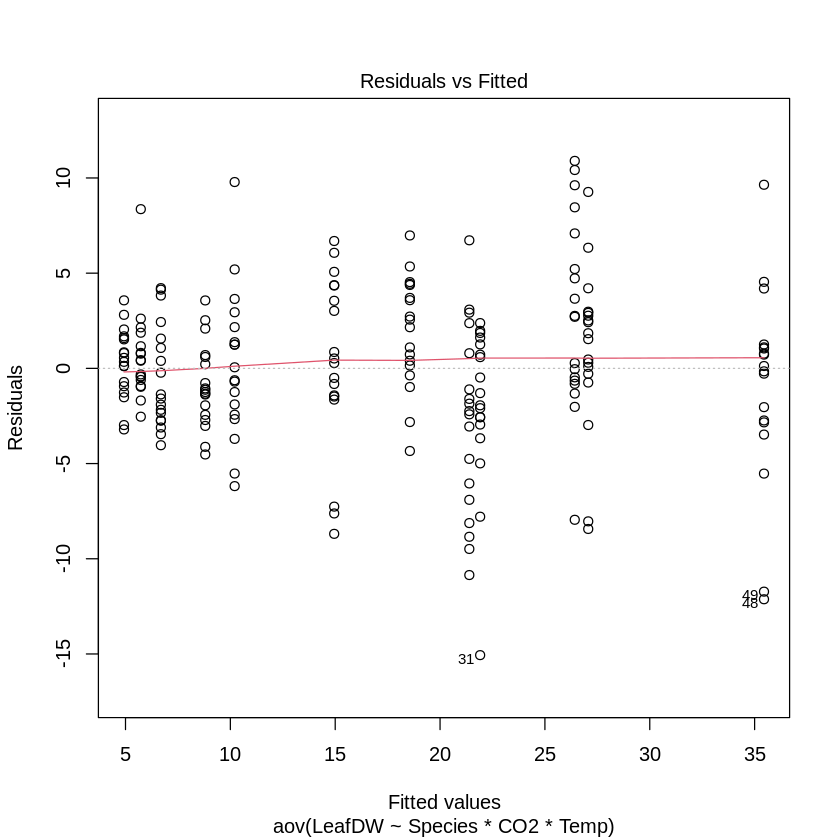

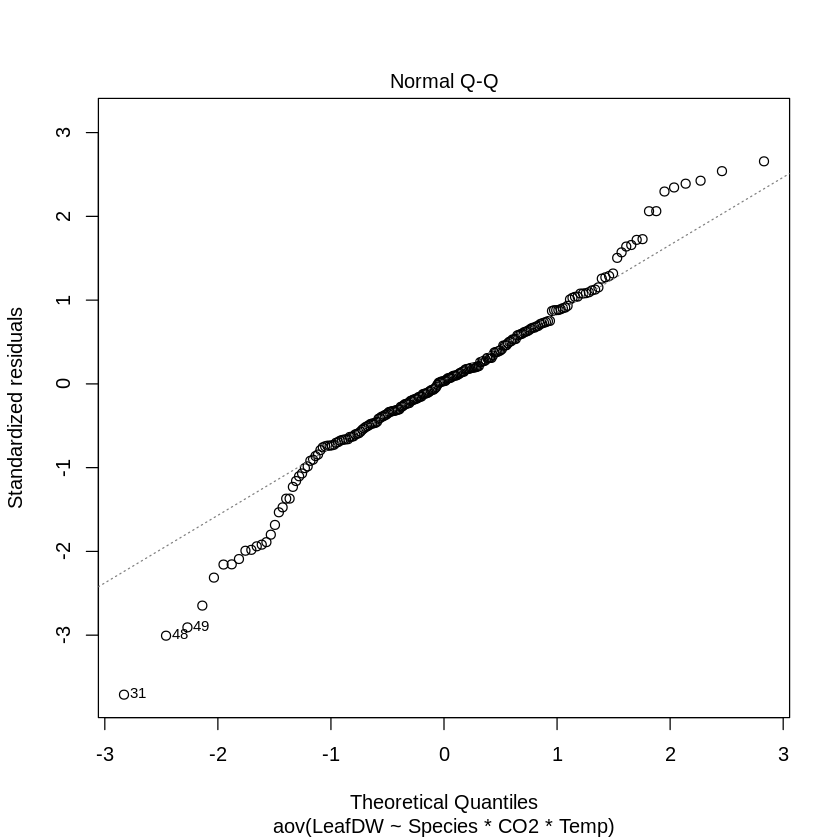

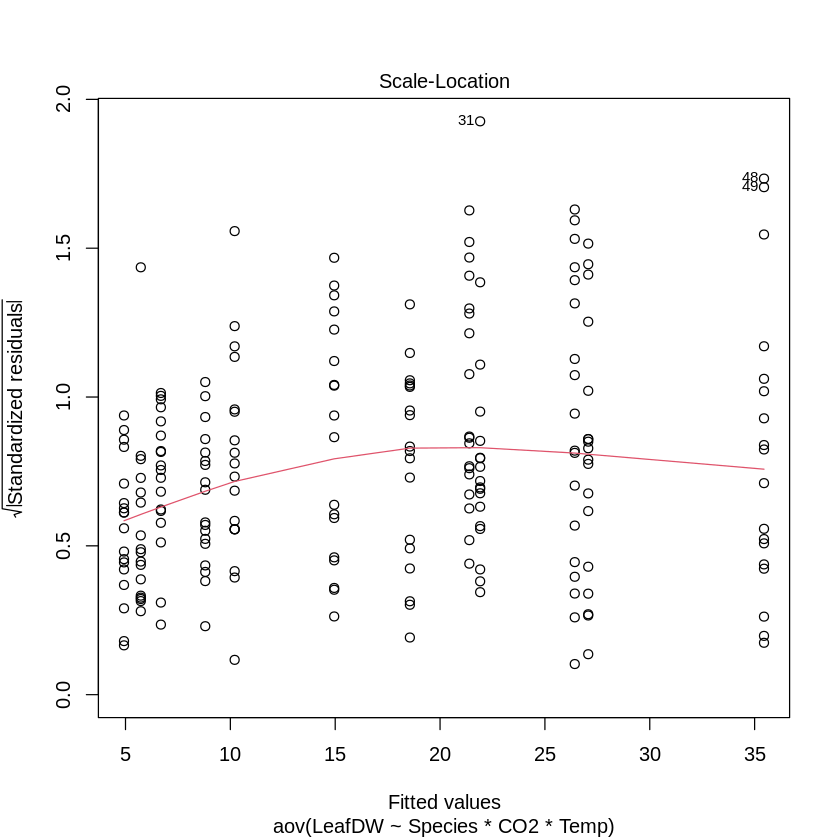

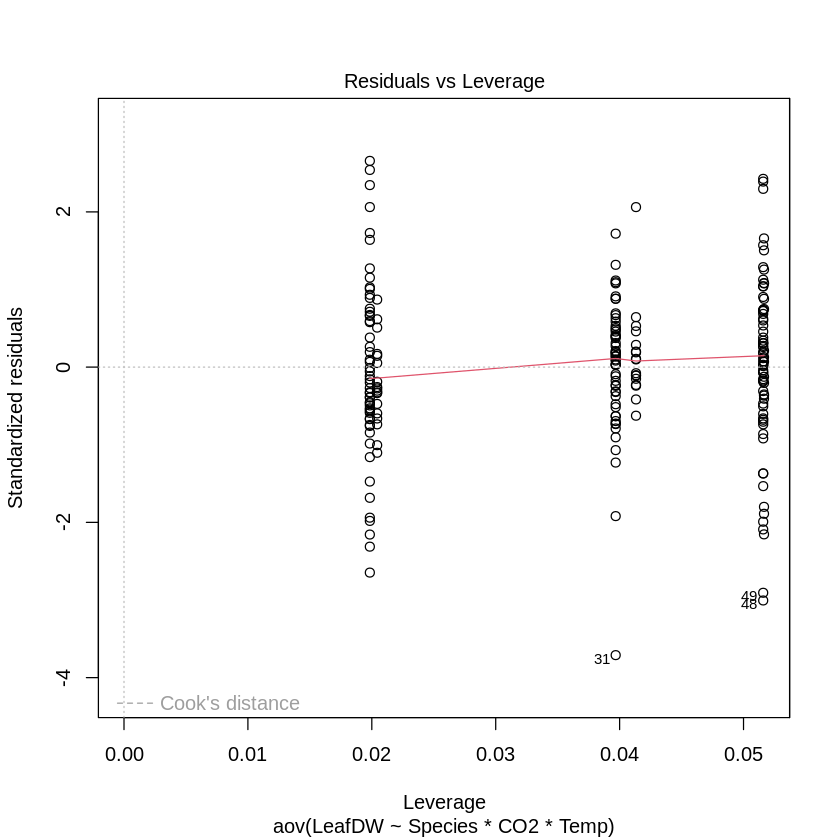

In [42]:
model <- aov(LeafDW ~ Species * CO2 * Temp, data=Ghannoum_a)

#view summary of three-way ANOVA
summary(model)

#Plot of ANOVA results
plot(model)

In [18]:
Ghannoum_a %>%
  group_by(Species, Temp, CO2) %>%
  summarize(Height = mean(Height))

`summarise()` has grouped output by 'Species', 'Temp'. You can override using
the `.groups` argument.


Species,Temp,CO2,Height
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,107.33333
Saligna,Amb,400,109.22222
Saligna,Amb,640,125.16667
Saligna,Elv,280,130.33333
Saligna,Elv,400,145.16667
Saligna,Elv,640,147.55556
Sideroxylon,Amb,280,74.38889
Sideroxylon,Amb,400,67.94444
Sideroxylon,Amb,640,88.77778


In [19]:
model <- aov(Height ~ Species * CO2 * Temp, data=Ghannoum_a)

#view summary of three-way ANOVA
summary(model)

#Plot of ANOVA results
plot(model)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
Species            1  80407   80407 395.226  < 2e-16 ***
CO2                1  15300   15300  75.205 1.24e-15 ***
Temp               1  34507   34507 169.611  < 2e-16 ***
Species:CO2        1    374     374   1.839    0.177    
Species:Temp       1    173     173   0.851    0.357    
CO2:Temp           1    220     220   1.084    0.299    
Species:CO2:Temp   1    647     647   3.179    0.076 .  
Residuals        207  42113     203                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Graphs
We copied or approximated the following graphs from the results section of the paper. 

![snippet_fig_1.png](attachment:snippet_fig_1.png)
Fig 1. Total plant dry mass and leaf area of E. saligna and E. sideroxylon. Means with whiskers for SE. 

![snippet_fig_2.png](attachment:snippet_fig_2.png)

Fig 2. Total leaf number and average leaf size of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

![snippet_fig_3.png](attachment:snippet_fig_3.png)

Fig 3. Total number of branches, main stem height and main stem basal diameter of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

![snippet_fig_4.png](attachment:snippet_fig_4.png)
Fig 4. Leaf mass per area (LMA), leaf area ration (LAR), net assimilation rates( NAR) and RGR of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

![snippet_fig_7.png](attachment:snippet_fig_7.png)
Fig 7. Percentage change of key measured physiological parameters of E. saligna and E. sideroxylon relative to current ambient conditions of CO2 and temp. 

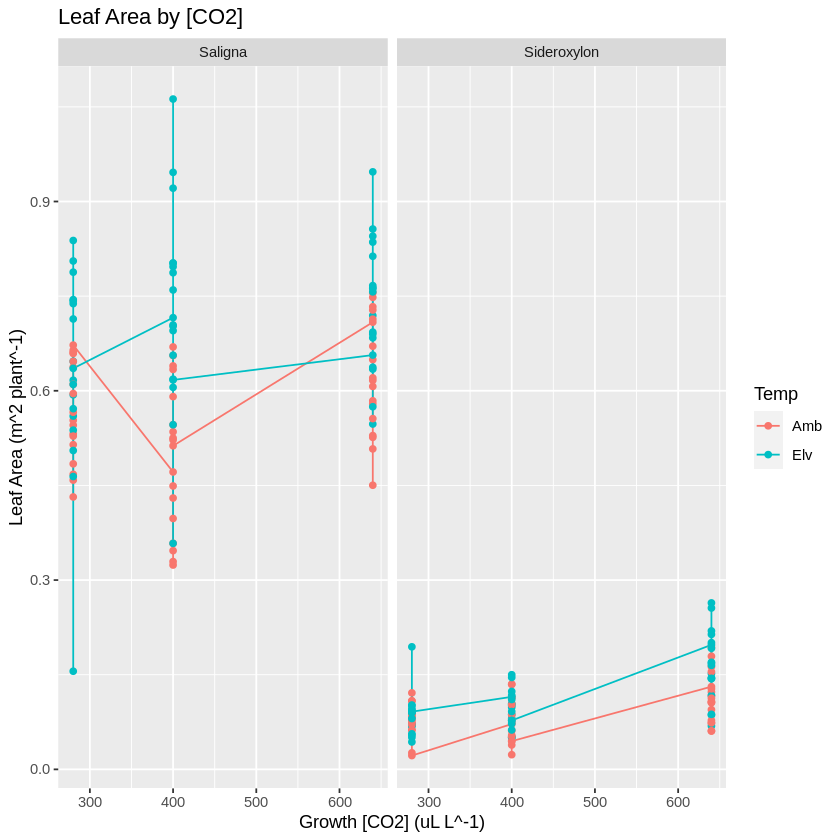

In [28]:
#Plotted leaf area against CO2 color-coded by temp for each species

LAplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=LA, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

LAplot + ggtitle("Leaf Area by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Leaf Area (m^2 plant^-1)") +
	scale_y_continuous(labels = label_number(scale = 1e-4))

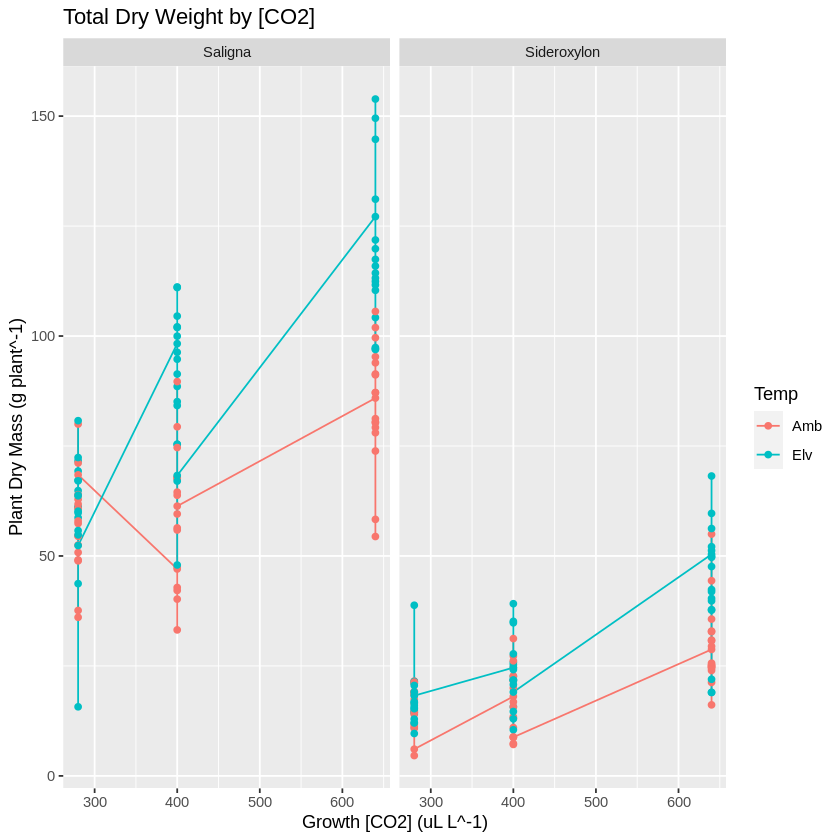

In [30]:
#Plotted total Dry Weight against CO2 color-coded by temp for each species

DWplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=totalDW, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

DWplot + ggtitle("Total Dry Weight by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Plant Dry Mass (g plant^-1)")

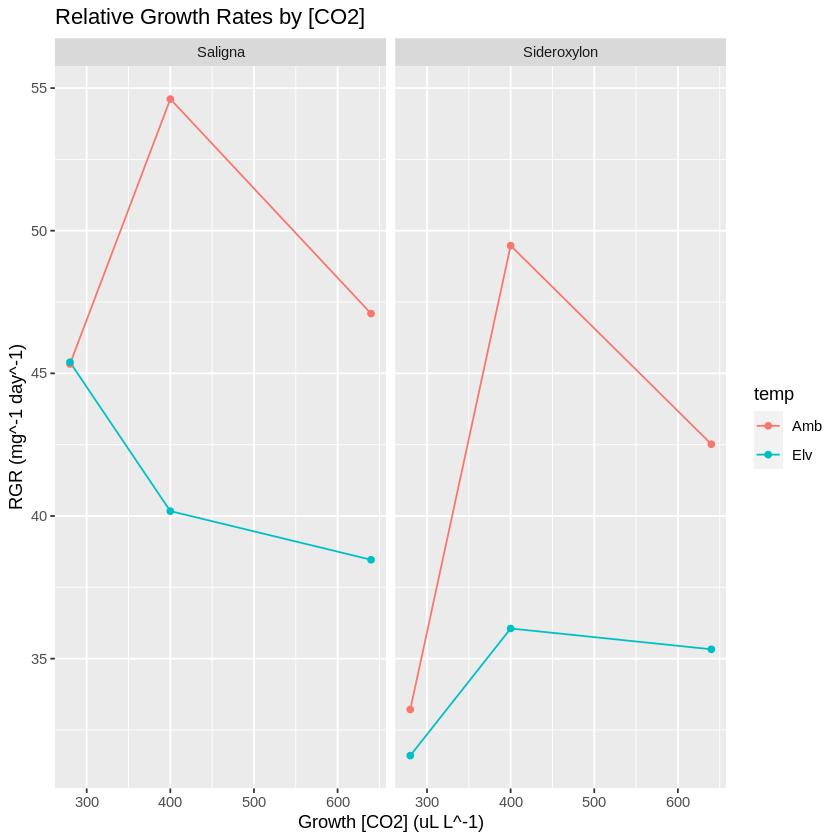

In [38]:
#Plotted RDR against CO2 color-coded by temp for each species

RGRplot <- ggplot(data =group_data, aes(x=CO2,y=rgr, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

RGRplot + ggtitle("Relative Growth Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("RGR (mg^-1 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 1000))

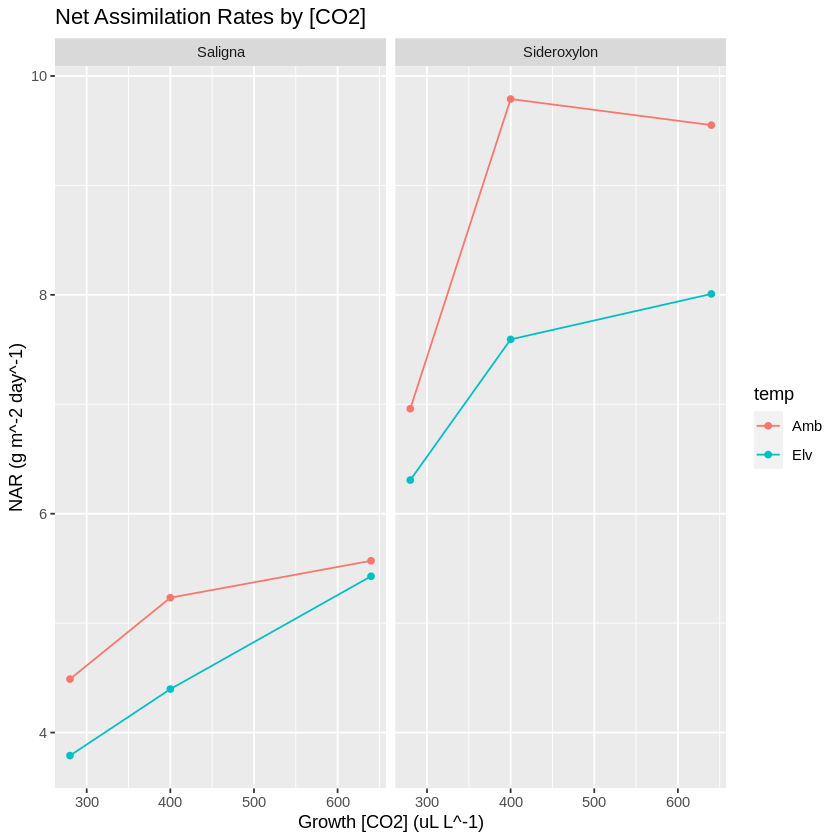

In [40]:
#Plotted NAR against CO2 by temp for each species

NARplot <- ggplot(data =group_data, aes(x=CO2,y=nar, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

NARplot + ggtitle("Net Assimilation Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("NAR (g m^-2 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 10000))